## Exploring Hubble Images
The aim of this notebook is to explore the Hubble observations and cutouts which will be used to create the training set.

In [77]:
from astropy.io import fits
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

from astropy.visualization import PercentileInterval, LinearStretch, ImageNormalize, SqrtStretch, ZScaleInterval
from astropy.visualization import LinearStretch, SqrtStretch, PowerStretch, SquaredStretch, LogStretch, AsinhStretch, SinhStretch, CompositeStretch
from astrocut import img_cut
from astropy import wcs
import astropy.units as u
from astropy.coordinates import SkyCoord

from drizzlepac import skytopix

from reproject.mosaicking import find_optimal_celestial_wcs, reproject_and_coadd
from reproject import reproject_interp



The following task in the stsci.skypac package can be run with TEAL:
                                    skymatch                                    
The following tasks in the drizzlepac package can be run with TEAL:
    astrodrizzle       config_testbed      imagefindpars           mapreg       
       photeq            pixreplace           pixtopix            pixtosky      
  refimagefindpars       resetbits          runastrodriz          skytopix      
     tweakback            tweakreg           updatenpol


In [6]:
folder = 'C:\\Users\\oryan\\Documents\\zoobot_new\\preprocessed-cutouts\\fromMAST\\AHZ20000ak\\mastDownload\\HLA\\'

In [44]:
filename_1 = [os.path.join(folder, 'hst_10092_5n_acs_wfc_f814w\\hst_10092_5n_acs_wfc_f814w_drz.fits')]

In [8]:
hdu_1 = fits.open(filename_1)
image_header_1 = fits.open(filename_1)[1].header
image_1_data = fits.open(filename_1)[1].data

In [9]:
image_header_1

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 5085                                                  
NAXIS2  =                 4924                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
INHERIT =                    T / inherit the primary header                     
EXTNAME = 'SCI     '           / extension name                                 
EXTVER  =                    1                                                  
BUNIT   = 'ELECTRONS/S'        / Units of science product                       
                                                                                
CD1_1   = -1.3888888888888E-

In [10]:
filename_2 = r'C:\Users\oryan\Documents\zoobot_new\preprocessed-cutouts\fromMAST\AHZ10004js\mastDownload\HLA\hst_12063_0s_acs_wfc_f814w\hst_12063_0s_acs_wfc_f814w_drz.fits'
#os.path.join(r'C:\Users\oryan\Documents\zoobot_new\preprocessed-cutouts\fromMAST\AHZ10004js', 'hst_12063_0s_acs_wfc_f814w\\hst_12063_0s_acs_wfc_f814w_drz.fits')

In [11]:
hdu_2 = fits.open(filename_2)
image_header_2 = fits.open(filename_2)[1].header
image_2_data = fits.open(filename_2)[1].data

In [12]:
image_header_2

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 5195                                                  
NAXIS2  =                 5208                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
INHERIT =                    T / inherit the primary header                     
EXTNAME = 'SCI     '           / extension name                                 
EXTVER  =                    1                                                  
BUNIT   = 'ELECTRONS/S'        / Units of science product                       
                                                                                
CD1_1   = -1.3888888888888E-

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


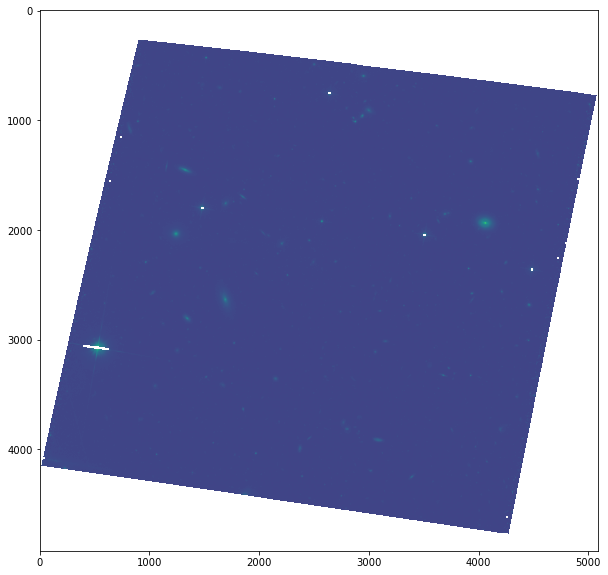

In [13]:
plt.figure(figsize=(10,10))
plt.imshow(np.log10(image_1_data))

In [14]:
df = pd.read_csv('C:/Users/oryan/Documents/zoobot_new/manifests/gz-hubble-local-manifest.csv',index_col=0).query('zooniverse_id == "AHZ20000ak"')
df

,zooniverse_id,RA,Dec,imaging,interacting,local_location
8646,AHZ20000ak,150.387822,1.594,COSMOS,1,C:/Users/oryan/Documents/zoobot/hubble-dataset...


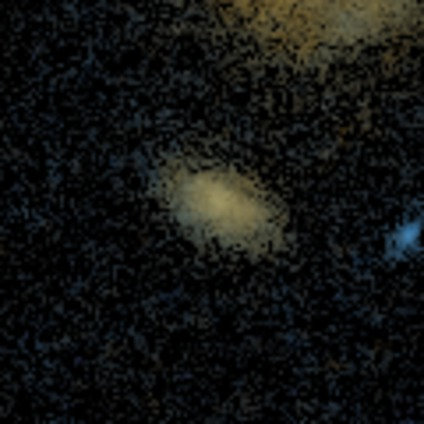

In [15]:
im = Image.open(df.local_location.iloc[0])
im

In [16]:
df.RA

8646    150.387822
Name: RA, dtype: float64

In [59]:
coords = SkyCoord(ra=df.RA * u.deg, dec=df.Dec * u.deg)

In [22]:
hdu_1

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x0000014FCDAC2508>, <astropy.io.fits.hdu.image.ImageHDU object at 0x0000014F800BF348>, <astropy.io.fits.hdu.image.ImageHDU object at 0x0000014F800C2788>, <astropy.io.fits.hdu.image.ImageHDU object at 0x0000014F800BB708>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000014F800EBE88>, <astropy.io.fits.hdu.image.ImageHDU object at 0x0000014F800F0808>]

In [23]:
wcs_out = wcs.WCS(fobj = hdu_2,header=image_header_1)

In [29]:
img_cut??

Signature:
img_cut(
    input_files,
    coordinates,
    cutout_size,
    stretch='asinh',
    minmax_percent=None,
    minmax_value=None,
    invert=False,
    img_format='jpg',
    colorize=False,
    cutout_prefix='cutout',
    output_dir='.',
    extension=None,
    verbose=False,
)
Source:   
def img_cut(input_files, coordinates, cutout_size, stretch='asinh', minmax_percent=None,
            minmax_value=None, invert=False, img_format='jpg', colorize=False,
            cutout_prefix="cutout", output_dir='.', extension=None, verbose=False):
    """
    Takes one or more fits files with the same WCS/pointing, makes the same cutout in each file,
    and returns the result either as a single color image or in individual image files.

    Note: No checking is done on either the WCS pointing or pixel scale. If images don't line up
    the cutouts will also not line up.

    Parameters
    ----------
    input_files : list
        List of fits image files to cutout from. The image is as

In [74]:
cutout_size = [300,300]

In [75]:
coord = SkyCoord(f"{df.RA.iloc[0]} {df.Dec.iloc[0]}", unit='deg')

In [76]:
cutout = img_cut(filename_1, coord, cutout_size, output_dir = 'C:/Users/oryan/Documents/esac-project/cutouts/img-cut')

In [85]:
skytopix.rd2xy(hdu_1,df.RA.iloc[0],df.Dec.iloc[0])

####
No valid WCS found in [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x0000014FCDAC2508>, <astropy.io.fits.hdu.image.ImageHDU object at 0x0000014F800BF348>, <astropy.io.fits.hdu.image.ImageHDU object at 0x0000014F800C2788>, <astropy.io.fits.hdu.image.ImageHDU object at 0x0000014F800BB708>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000014F800EBE88>, <astropy.io.fits.hdu.image.ImageHDU object at 0x0000014F800F0808>].
  Results may be invalid.
####

# Coordinate transformations for  [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x0000014FCDAC2508>, <astropy.io.fits.hdu.image.ImageHDU object at 0x0000014F800BF348>, <astropy.io.fits.hdu.image.ImageHDU object at 0x0000014F800C2788>, <astropy.io.fits.hdu.image.ImageHDU object at 0x0000014F800BB708>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000014F800EBE88>, <astropy.io.fits.hdu.image.ImageHDU object at 0x0000014F800F0808>]
# X      Y         RA             Dec

150.387822  1.594000    150.3878223  1.5939996


(150.3878223, 1.5939996)

In [250]:
pix = coords.to_pixel(wcs.WCS(image_header_1))

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


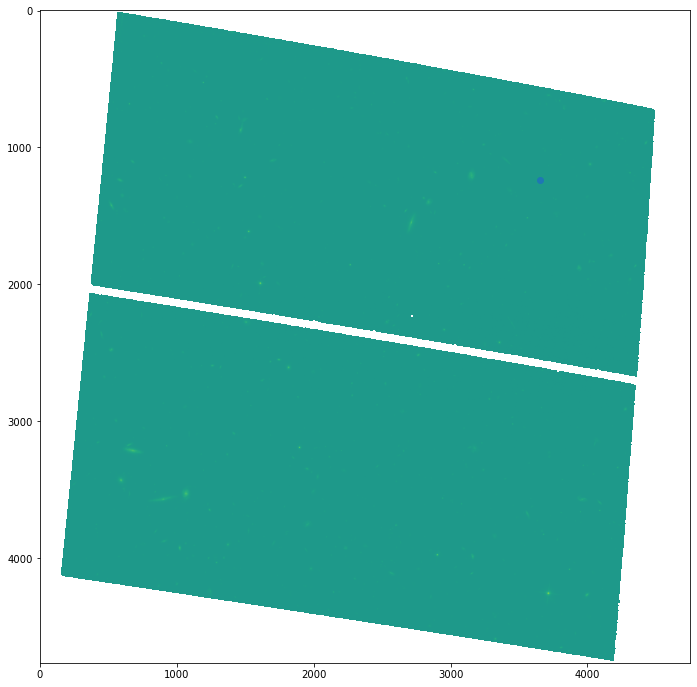

In [251]:
plt.figure(figsize=(12,12))
plt.imshow(np.log10(image_1_data))
plt.scatter(pix[1],pix[0])

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


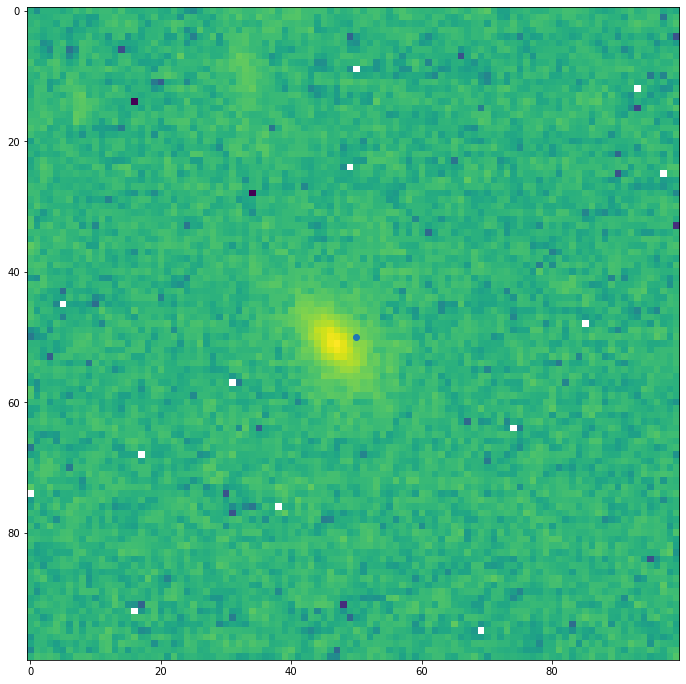

In [252]:
plt.figure(figsize=(12,12))
plt.imshow(np.log10(cutout.data))
plt.scatter(cutout.data.shape[0]/2,cutout.data.shape[1]/2)

In [253]:
cutout.data

array([[0.03508338, 0.01361769, 0.03983199, ..., 0.02912417, 0.0368352 ,
        0.03022727],
       [0.04358299, 0.0423433 , 0.03588464, ..., 0.00574111, 0.0458295 ,
        0.05766204],
       [0.04146666, 0.05208675, 0.04011364, ..., 0.02934231, 0.04957065,
        0.07067913],
       ...,
       [0.02733809, 0.04674019, 0.04613851, ..., 0.04644746, 0.0431193 ,
        0.03910252],
       [0.01176902, 0.05068423, 0.04255575, ..., 0.03291759, 0.05991919,
        0.06396004],
       [0.04190077, 0.06742624, 0.0574912 , ..., 0.0319614 , 0.04985401,
        0.08100265]], dtype=float32)

In [16]:
from acstools import acszpt

In [17]:
correction_inf = 0.83

In [18]:
flux_inf = cutout.data / correction_inf

In [105]:
F_lambda = flux_inf * image_header_1['PHOTFLAM']

In [106]:
ZP = -2.5*np.log10(image_header_1['PHOTFLAM']) - 5 * np.log10(image_header_1['PHOTPLAM']) - 2.408

In [107]:
m_ab = -2.5 * np.log10(flux_inf) + ZP

In [108]:
m_ab

array([[28.36635 , 28.552738, 28.698761, ..., 28.356487, 28.398798,
        28.530079],
       [28.509048, 28.619972, 28.665228, ..., 28.548552, 28.473114,
        28.677343],
       [28.820518, 28.533108, 28.470789, ..., 28.693764, 28.606134,
        28.578825],
       ...,
       [28.460033, 28.543104, 28.398977, ..., 28.42236 , 28.446297,
        28.415514],
       [28.521574, 28.535994, 28.438751, ..., 28.548307, 28.51529 ,
        28.712473],
       [28.443233, 28.543236, 28.687841, ..., 28.63515 , 28.545986,
        28.5088  ]], dtype=float32)

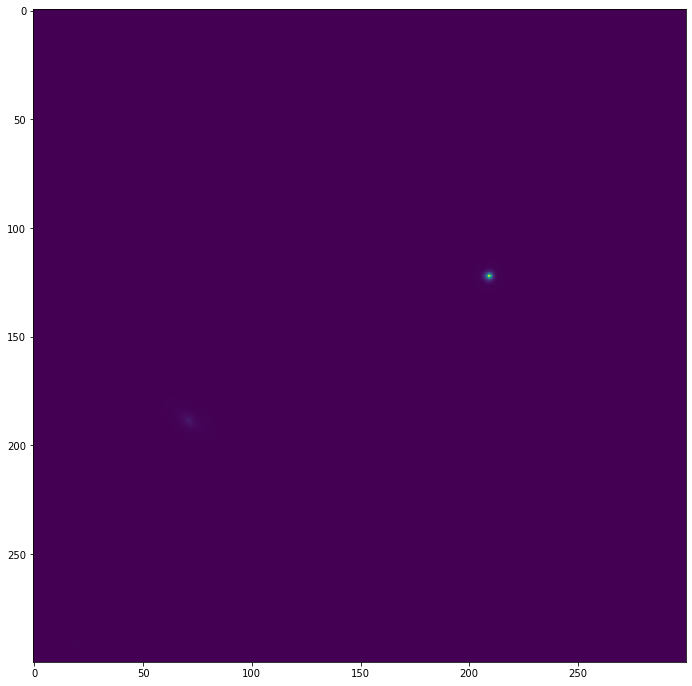

In [109]:
plt.figure(figsize=(12,12))
plt.imshow((cutout.data))

In [144]:
max_lim = np.mean(cutout.data[m_ab < 25])

In [145]:
max_lim

10.457009

In [146]:
cutout.data[m_ab <= 24.5] = max_lim

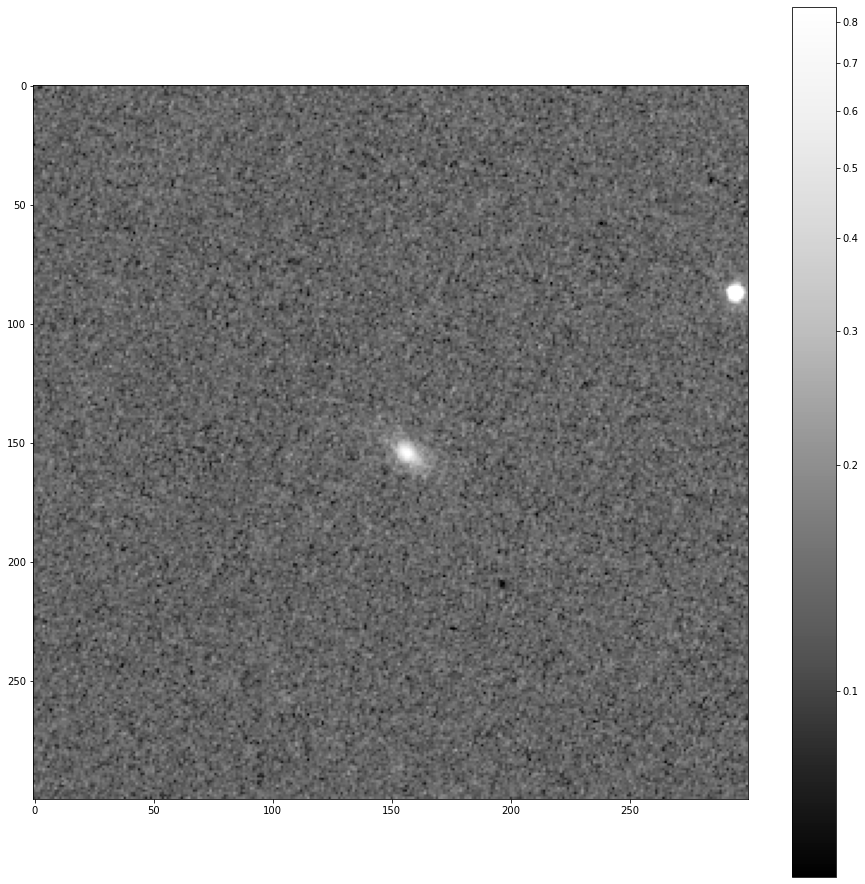

In [51]:
norm = ImageNormalize(cutout.data, interval=ZScaleInterval(nsamples=5000,contrast=0.05),stretch=AsinhStretch(),clip=True)
plt.figure(figsize=(16,16))
plt.imshow(cutout.data,cmap='Greys_r',norm=norm)
plt.colorbar()

In [9]:
filename_2 = os.path.join(folder, 'hst_10092_0h_acs_wfc_f814w_j8xi0h\hst_10092_0h_acs_wfc_f814w_j8xi0h_drc.fits')

In [10]:
hdu_2 = fits.open(filename_2)[1]
image_header_2 = fits.open(filename_2)[1].header
image_2_data = fits.open(filename_2)[1].data

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


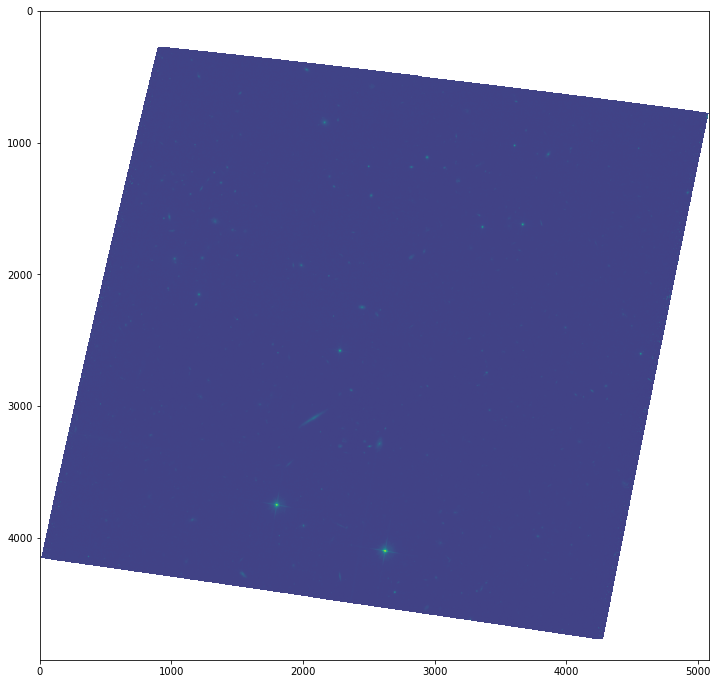

In [11]:
plt.figure(figsize=(12,12))
plt.imshow(np.log10(image_2_data))

In [12]:
hdus = [hdu_1, hdu_2]

In [13]:
wcs_out, shape_out = find_optimal_celestial_wcs(hdus)

In [14]:
array, footprint = reproject_and_coadd(hdus, output_projection=wcs_out, shape_out = shape_out, reproject_function=reproject_interp)

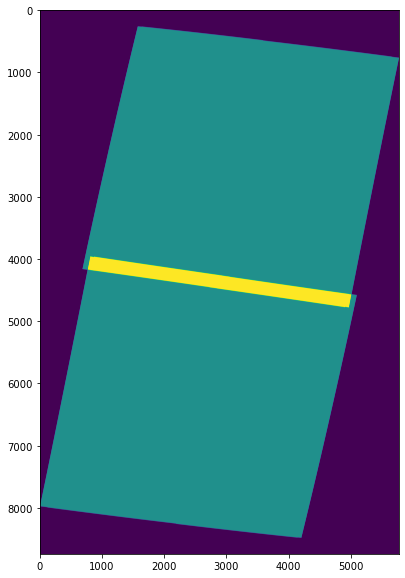

In [15]:
plt.figure(figsize=(10,10))
plt.imshow(footprint)

In [16]:
filename_3 = os.path.join(folder, 'hst_10092_4g_acs_wfc_f814w_j8xi4g\\hst_10092_4g_acs_wfc_f814w_j8xi4g_drc.fits')

In [17]:
hdu_3 = fits.open(filename_3)[1]
image_header_3 = fits.open(filename_3)[1].header
image_3_data = fits.open(filename_3)[1].data

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


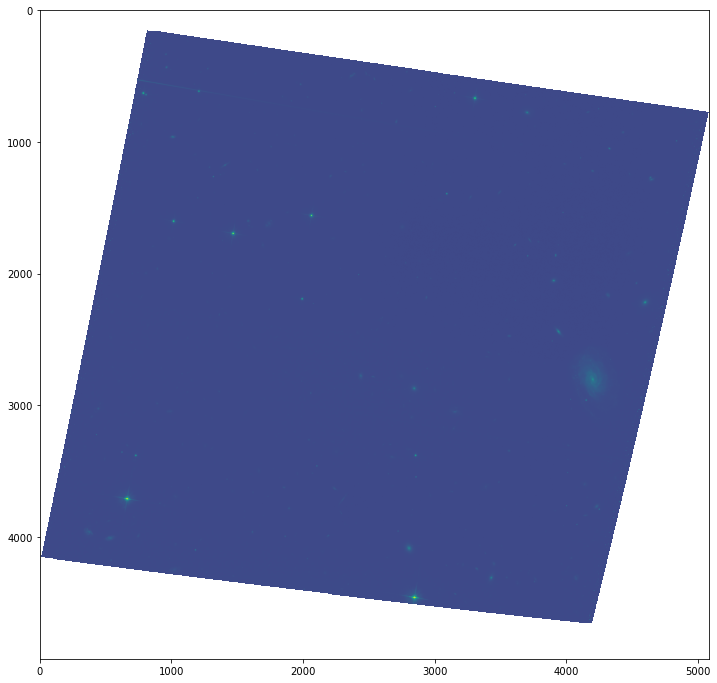

In [18]:
plt.figure(figsize=(12,12))
plt.imshow(np.log10(image_3_data))

In [19]:
hdus = [hdu_1,hdu_2,hdu_3]

In [20]:
wcs_out, shape_out = find_optimal_celestial_wcs(hdus)

In [21]:
array, footprint = reproject_and_coadd(hdus,wcs_out,shape_out=shape_out,reproject_function=reproject_interp)

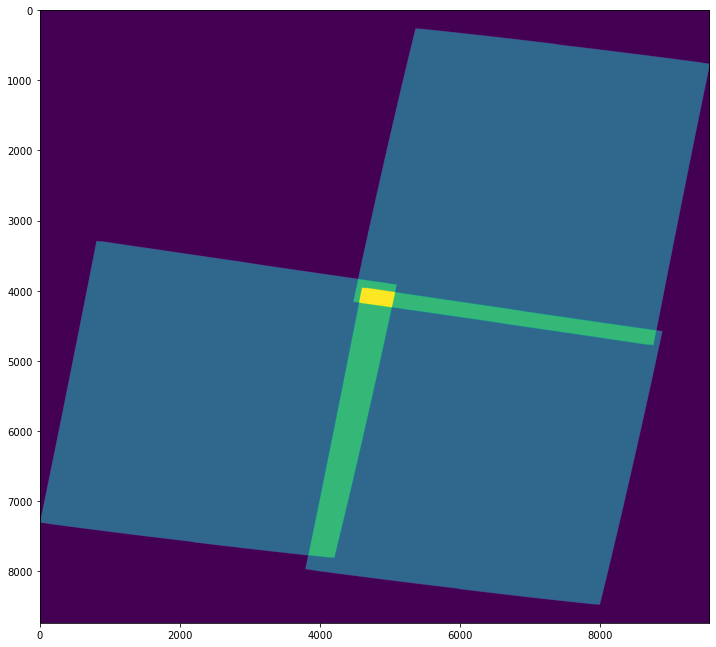

In [22]:
plt.figure(figsize=(12,12))
plt.imshow(footprint)

In [23]:
image_header_3

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 5088                                                  
NAXIS2  =                 4927                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
INHERIT =                    T / inherit the primary header                     
EXTNAME = 'SCI     '           / extension name                                 
EXTVER  =                    1                                                  
BUNIT   = 'ELECTRONS/S'        / Units of science product                       
                                                                                
              / WFC CCD CHIP

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


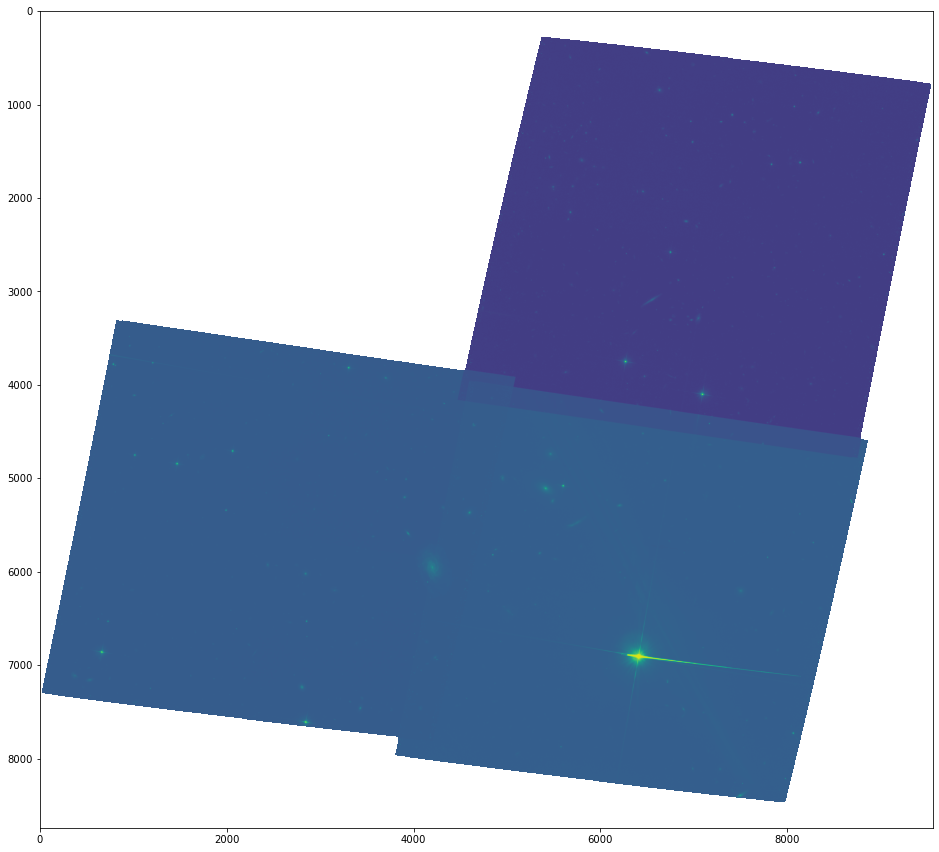

In [24]:
plt.figure(figsize=(16,16))
plt.imshow(np.log10(array))

In [25]:
coords = SkyCoord(ra=150.562364 * u.deg, dec=1.8324716 * u.deg, frame='fk5')

In [26]:
pix_coords = list(wcs.utils.skycoord_to_pixel(coords,wcs_out))

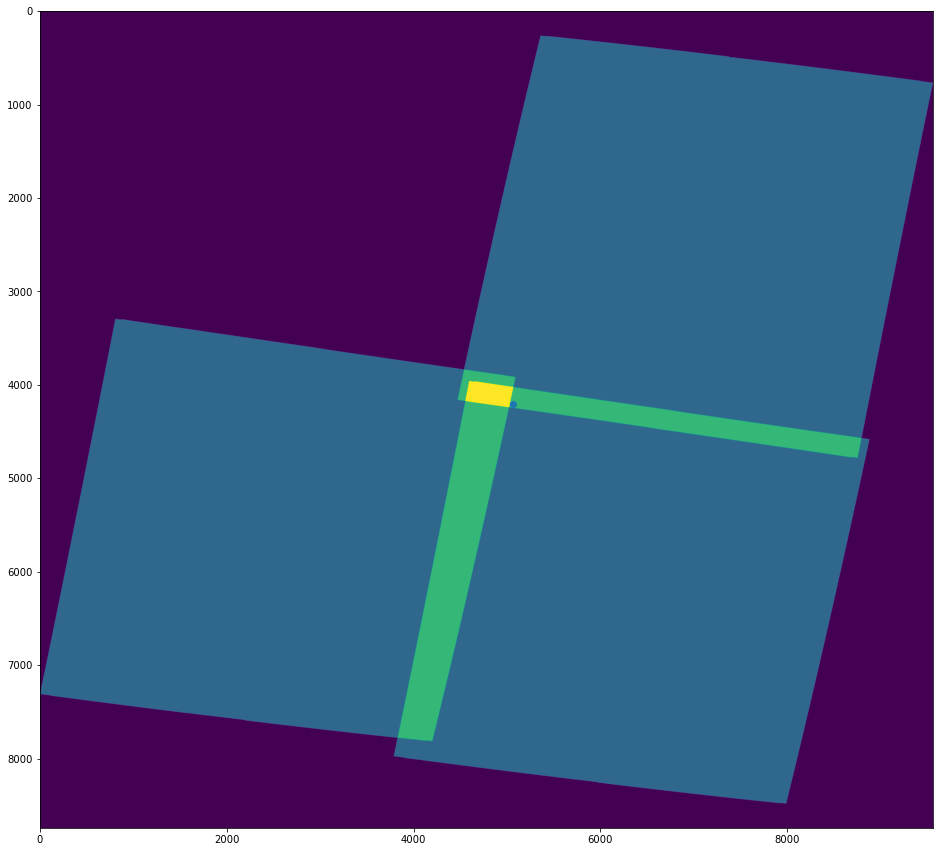

In [27]:
plt.figure(figsize=(16,16))
plt.scatter(pix_coords[0],pix_coords[1])
plt.imshow(footprint)

In [28]:
cutout = Cutout2D(array, coords, (150,150), wcs=wcs_out, mode='partial')

In [29]:
norm = ImageNormalize(np.log10(cutout.data), interval=ZScaleInterval(),stretch=LinearStretch())
plt.figure(figsize=(16,16))
plt.imshow(np.log10(cutout.data),cmap='Greys_r',norm=norm)

NameError: name 'ZScaleInterval' is not defined

In [ ]:
image_header_1

In [ ]:
image_header_2

In [ ]:
image_header_3